<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_0603_2d_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 30
np.random.seed(1981)

θ0_true = 2
θ1_true = 0.5

f = lambda x: θ0_true + θ1_true * x
x = np.sort(np.random.rand(m))
y = f(x) + np.random.randn(m) * .1

In [3]:
print(*zip(x[:2], y[:2]))

(0.023854724188708487, 2.081493195524424) (0.06890000375170813, 2.0362511200217597)


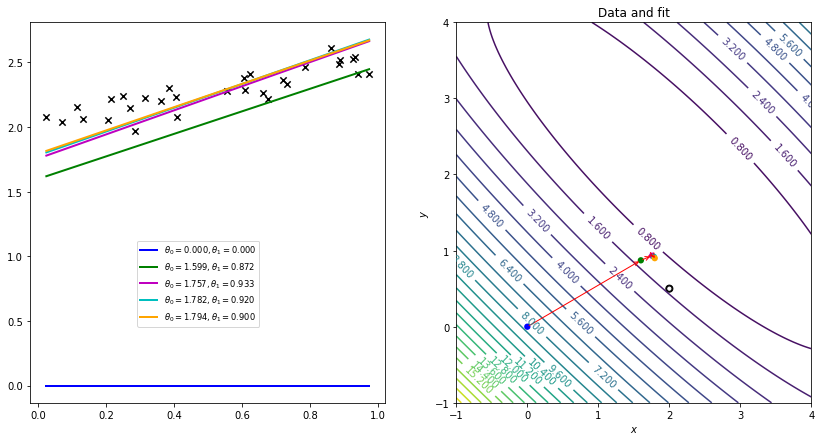

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost(θ0, θ1):
    θ0 = np.atleast_3d(np.asarray(θ0))
    θ1 = np.atleast_3d(np.asarray(θ1))
    return np.average((y-h(x, θ0, θ1))**2, axis=2)/2

def h(x, θ0, θ1):
    return θ0 + θ1 * x

θ0_grid = np.linspace(-1, 4, 101)
θ1_grid = np.linspace(-5, 4, 101)
J_grid = cost(θ0_grid[np.newaxis, :, np.newaxis],
              θ1_grid[:, np.newaxis, np.newaxis])

X, Y = np.meshgrid(θ0_grid, θ0_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
ax[1].scatter([θ0_true]*2, [θ1_true]*2, s=[50, 10], color=['k', 'w'])

N = 5
α = 0.7
θ = [np.array((0, 0))]
J = [cost(*θ[0])[0]]

for j in range(N - 1):
    lastθ = θ[-1]
    thisθ = np.empty((2,))
    thisθ[0] = lastθ[0] - α / m * np.sum((h(x, *lastθ) - y))
    thisθ[1] = lastθ[1] - α / m * np.sum((h(x, *lastθ) - y) * x)

    θ.append(thisθ)
    J.append(cost(*thisθ))

colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, h(x, *θ[0]), color=colors[0], lw=2,
           label=r'$\theta_0={:.3f}, \theta_1={:.3f}$'.format(*θ[0]))

for j in range(1, N):
    ax[1].annotate('', xy=θ[j], xytext=θ[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, h(x, *θ[j]), color=colors[j], lw=2,
               label=r'$\theta_0={:.3f}, \theta_1={:.3f}$'.format(*θ[j]))
    
ax[1].scatter(*zip(*θ), c=colors, s=40, lw=0)

ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].set_title('Data and fit')
axbox = ax[0].get_position()

ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()